In [3]:
# installing on desktop, 

%cd /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

/Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3
Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13221 (delta 0), reused 1 (delta 0), pack-reused 13218
Receiving objects: 100% (13221/13221), 11.92 MiB | 5.96 MiB/s, done.
Resolving deltas: 100% (9042/9042), done.
Updating files: 100% (1995/1995), done.


In [5]:
# make darknet (build), edit darknet/makefile: opencv=1, LISB=1 (to make libdarknet.so file) 
!make

l -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/dark_cuda.c -o obj/dark_cuda.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
./src/convolutional_layer.c:759:9: warning: unused variable 'old_w'
      [-Wunused-variable]
    int old_w = l->w;
        ^
./src/convolutional_layer.c:760:9: warning: unused variable 'old_h'
      [-Wunused-variable]
    int old_h = l->h;
        ^
./src/convolutional_layer.c:1204:32: warning: unused variable 't_intput_size'
      [-Wunused-variable]
                        size_t t_intput_size = binary_transpose_align_in...
                               ^
3 warnings generated.
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknow

In [7]:
# testing that it darknet is working
!./darknet

usage: ./darknet <function>


In [8]:
# define helper functions. This is used to dislay results
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128   

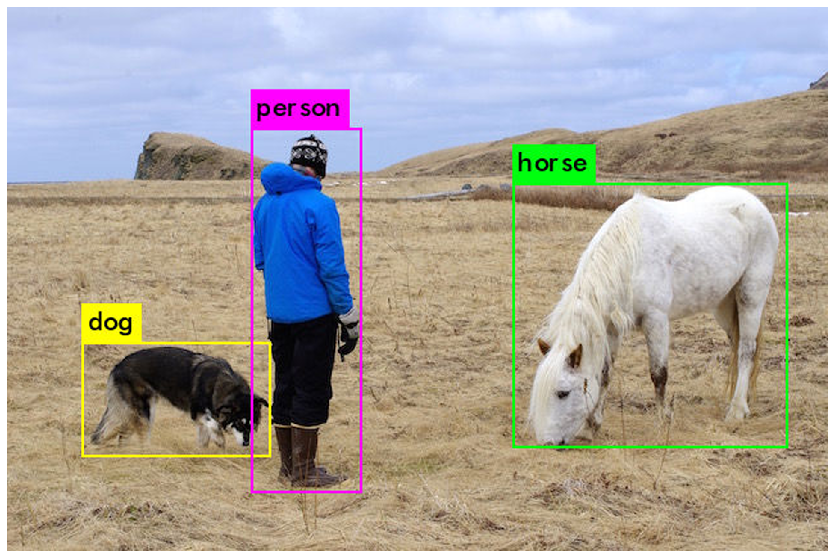

In [10]:
# run darknet test detection using yolov3.weights
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
imShow('predictions.jpg')

GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128   

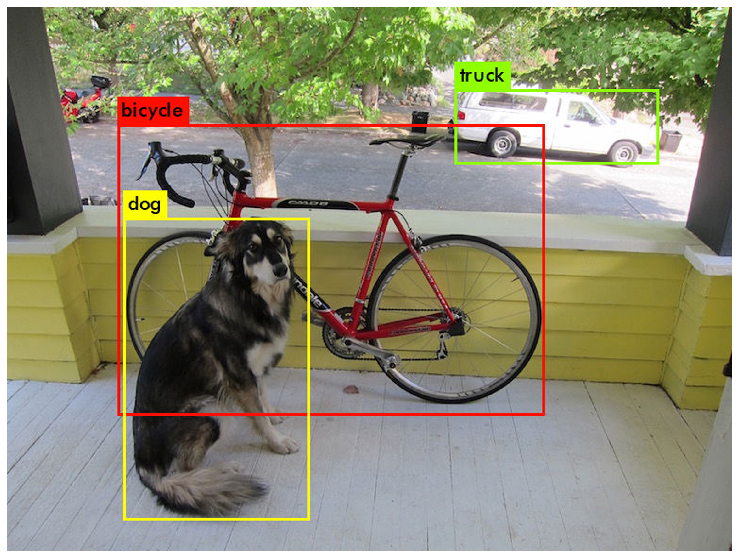

In [11]:
# run darknet test detection using yolov3.weights
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:
# train the custom detector using dataset downloaded from google's Open Images Dataset V6 + Extensions. classes are Shirt Dress Boot Shorts Jeans. 
# dataset was relablled into 'obj' and copied into darknet/data/
# in darknet/classes.txt, the names of classes were changed to the classes downloaded
# dataset was downloaded. 
# used TheAiGuy's generate_train.py function to convert the labels from the dataset to yolo complatible

# trained using a custom yolov3 config, for 5 classes.
# train.txt, data/obj.data, data/obj.names was generated using another TheAiGuy's py code to classify labelled images into categories according to the classes.txt
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [0]:
imShow('chart.png')

In [0]:
# contintue training from the last weight save (saves after each 100 iterations) 

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mygoogledrive/yolov3/backup/yolov3_custom_last.weights -dont_show

GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128   

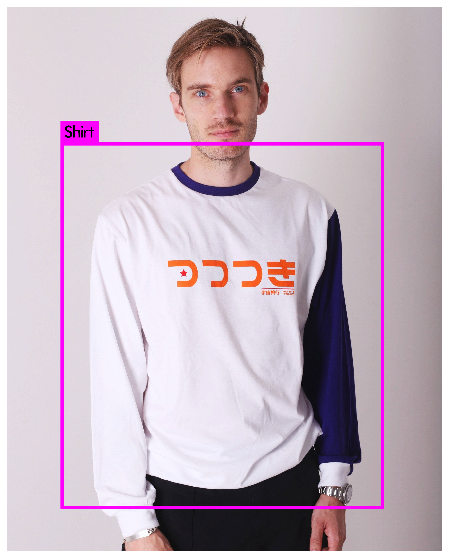

In [15]:
# run custom detector on test image 
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/backup/yolov3_custom_last.weights /Users/ibrahim/Downloads/fashion_mask_rcnn/felix-longsleeve.jpg -thresh 0.3
imShow('predictions.jpg')

OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Short

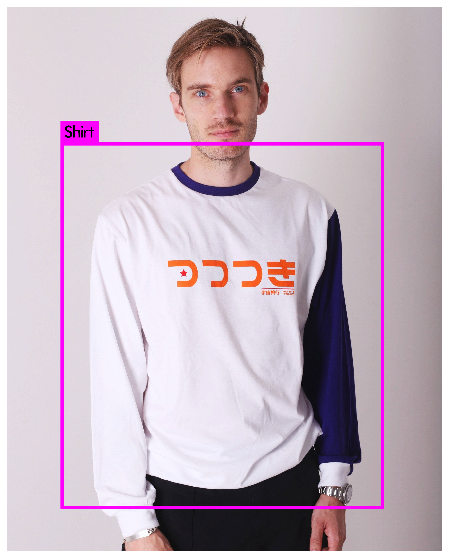

In [18]:
# generate results.txt for the results --- uncessary
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/backup/yolov3_custom_last.weights -dont_show -ext_output  /Users/ibrahim/Downloads/fashion_mask_rcnn/felix-longsleeve.jpg < data/train.txt > /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/result.txt
imShow('predictions.jpg')

OpenCV version: 4.2.0
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8,  wt = 0, wn = 0,

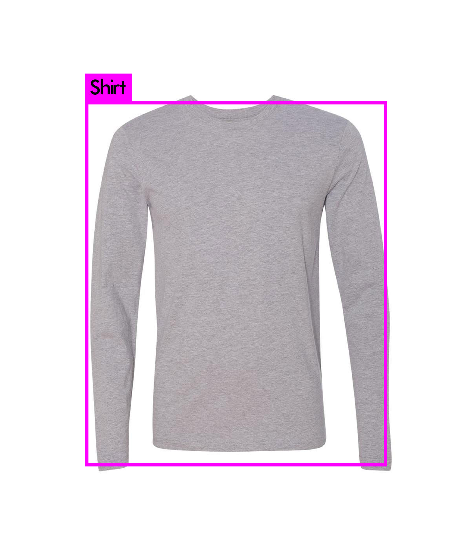

In [56]:
# test on another iamge
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/backup/yolov3_custom_last.weights -dont_show -ext_output  /Users/ibrahim/Downloads/fashion_mask_rcnn/ahzekLR.jpg < data/train.txt > /Users/ibrahim/Downloads/fashion_mask_rcnn/result.txt
imShow('predictions.jpg')

In [95]:
# results output to be displayed using the webapp

sys.path.append('/Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet')
import darknet as dn
# img=cv2.imread('/Users/ibrahim/Downloads/fashion_mask_rcnn/front.jpg')
# img = img.resize((512, 512))
# img = np.array(img)
img='/Users/ibrahim/Downloads/fashion_mask_rcnn/felix-longsleeve.jpg'
img=img.encode('utf-8')

net_filename='cfg/yolov3_custom.cfg'
net_filename=net_filename.encode('utf-8')
weights_filename='/Users/ibrahim/Downloads/fashion_mask_rcnn/yolov3/darknet/yolov3_custom_last.weights'
weights_filename=weights_filename.encode('utf-8')
meta_filename='data/obj.data'
meta_filename=meta_filename.encode('utf-8')

net=dn.load_net(net_filename,weights_filename,0)
meta= dn.load_meta(meta_filename)
r= dn.detect(net,meta, img)
print(r)
# r=r.decode("utf-8")
r=np.array(r)
class_names=[]
probab_of_class=[]
for k in range(r.shape[0]):
    class_names.append(r[k][0].decode("utf-8"))
    probab_of_class.append(r[k][1])
print(class_names)
print(probab_of_class)

[(b'Shirt', 0.8977258205413818, (1095.3717041015625, 1620.7183837890625, 1644.9207763671875, 1867.5653076171875))]
['Shirt']
[0.8977258205413818]
